In [25]:
#Package imports required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import seaborn as sns
from scipy import stats
import math
import scipy

In [26]:
#Dataset extract
df = pd.read_csv('data\\kc_house_data.csv')

In [27]:
# Get basic description of the data, looking the spread of the different variables,
# along with reviewing variances between the min, 25th, 50th, 75th, and max for the different variables
#correcting datatypes and describing without exponential ramifications
pd.options.display.float_format = lambda x : '{:.0f}'.format(x) if int(x) == x else '{:,.2f}'.format(x) 
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21597,21597,21597,21597,21597,21597,21597,19221,21534,21597,21597,21597,21597,17755,21597,21597,21597,21597,21597
mean,"4,580,474,287.77","540,296.57",3.37,2.12,"2,080.32","15,099.41",1.49,0.01,0.23,3.41,7.66,"1,788.60","1,971.00",83.64,"98,077.95",47.56,-122.21,"1,986.62","12,758.28"
std,"2,876,735,715.75","367,368.14",0.93,0.77,918.11,"41,412.64",0.54,0.09,0.77,0.65,1.17,827.76,29.38,399.95,53.51,0.14,0.14,685.23,"27,274.44"
min,1000102,78000,1,0.50,370,520,1,0,0,1,3,370,1900,0,98001,47.16,-122.52,399,651
25%,2123049175,322000,3,1.75,1430,5040,1,0,0,3,7,1190,1951,0,98033,47.47,-122.33,1490,5100
50%,3904930410,450000,3,2.25,1910,7618,1.50,0,0,3,7,1560,1975,0,98065,47.57,-122.23,1840,7620
75%,7308900490,645000,4,2.50,2550,10685,2,0,0,4,8,2210,1997,0,98118,47.68,-122.12,2360,10083
max,9900000190,7700000,33,8,13540,1651359,3.50,1,4,5,13,9410,2015,2015,98199,47.78,-121.31,6210,871200


In [4]:
df.info()
#Reviewing the data to understand how to address the business problem
#We are attempting to predict price coefficient and if price of homes in this area strongly aligns with sqft_living data observed.  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
#Look at correlations between variables to identify best predictor for response (score)
df.corr()

#Can see the strongest predictor of price is sqft_living with a 70% correlation - with grade in close second at 67%, and sqft_above at 61%. 

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1,-0.02,0.00,0.01,-0.01,-0.13,0.02,-0.00,0.01,-0.02,0.01,-0.01,0.02,-0.01,-0.01,-0.00,0.02,-0.00,-0.14
price,-0.02,1,0.31,0.53,0.70,0.09,0.26,0.28,0.40,0.04,0.67,0.61,0.05,0.13,-0.05,0.31,0.02,0.59,0.08
bedrooms,0.00,0.31,1,0.51,0.58,0.03,0.18,-0.00,0.08,0.03,0.36,0.48,0.16,0.02,-0.15,-0.01,0.13,0.39,0.03
bathrooms,0.01,0.53,0.51,1,0.76,0.09,0.50,0.07,0.19,-0.13,0.67,0.69,0.51,0.05,-0.20,0.02,0.22,0.57,0.09
sqft_living,-0.01,0.70,0.58,0.76,1,0.17,0.35,0.11,0.28,-0.06,0.76,0.88,0.32,0.06,-0.20,0.05,0.24,0.76,0.18
sqft_lot,-0.13,0.09,0.03,0.09,0.17,1,-0.00,0.02,0.08,-0.01,0.11,0.18,0.05,0.00,-0.13,-0.09,0.23,0.14,0.72
floors,0.02,0.26,0.18,0.50,0.35,-0.00,1,0.02,0.03,-0.26,0.46,0.52,0.49,0.00,-0.06,0.05,0.13,0.28,-0.01
waterfront,-0.00,0.28,-0.00,0.07,0.11,0.02,0.02,1,0.41,0.02,0.09,0.08,-0.03,0.09,0.03,-0.01,-0.04,0.09,0.03
view,0.01,0.40,0.08,0.19,0.28,0.08,0.03,0.41,1,0.05,0.25,0.17,-0.05,0.10,0.09,0.01,-0.08,0.28,0.07
condition,-0.02,0.04,0.03,-0.13,-0.06,-0.01,-0.26,0.02,0.05,1,-0.15,-0.16,-0.36,-0.06,0.00,-0.02,-0.11,-0.09,-0.00


In [6]:
df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [7]:
#refined dataset and drop unnecessary column data
df.drop(['id', 'date', 'waterfront', 'sqft_above', 'sqft_basement', 'lat', 'long', 'view', 'sqft_living15', 'sqft_lot15', 'waterfront', 'yr_renovated'], axis=1, inplace=True)

In [8]:
df.drop_duplicates(inplace=True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,zipcode
0,221900,3,1,1180,5650,1,3,7,1955,98178
1,538000,3,2.25,2570,7242,2,3,7,1951,98125
2,180000,2,1,770,10000,1,3,6,1933,98028
3,604000,4,3,1960,5000,1,5,7,1965,98136
4,510000,3,2,1680,8080,1,3,8,1987,98074


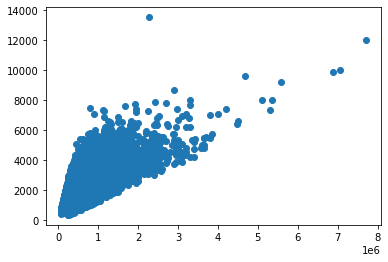

In [9]:
#Let's plot cost vs. score
plt.scatter(df['price'], df['sqft_living']);

#Strong linear association between price and sqft_living

In [10]:
#Assign x, y then do training testing split
x=df['price']
y=df['sqft_living']

#Splitting with 75% training, 25% testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.75,
                                                    test_size = 0.25, random_state = 100)

In [11]:
#statsmodel approach to regression
# fit the model
lr = sm.OLS(y_train, x_train).fit()

# Printing the parameters
lr.params
lr.summary()

#force intercept term
x_train_with_intercept = sm.add_constant(x_train)
lr = sm.OLS(y_train, x_train_with_intercept).fit()
lr.summary()

C:\Users\racar\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            sqft_living   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                 1.587e+04
Date:                Sat, 28 May 2022   Prob (F-statistic):               0.00
Time:                        12:09:31   Log-Likelihood:            -1.2792e+05
No. Observations:               16191   AIC:                         2.559e+05
Df Residuals:                   16189   BIC:                         2.559e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1133.7785      9.085    124.795      0.000    1115.971    1151.586
price          0.0017   1.39e-05    125.995      0.000       0.002       0.002
==============================================================================
Omnibus:                     2371.906   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8452.246
Skew:                           0.722   Prob(JB):                         0.00
Kurtosis:                       6.232   Cond. No.                     1.16e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

const   1,133.78
price       0.00
dtype: float64


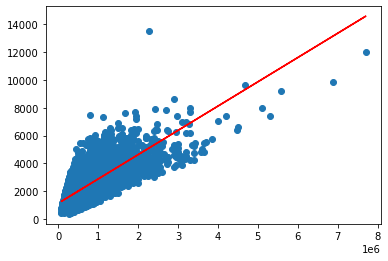

In [12]:
#Extract the B0, B1
print(lr.params)
b0=lr.params[0]
b1=lr.params[1]

#Plot the fitted line on training data
plt.scatter(x_train, y_train)
plt.plot(x_train, b0+ b1*x_train, 'r')
plt.show()

C:\Users\racar\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


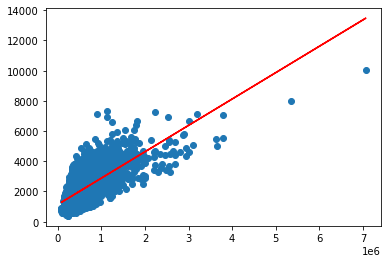

In [13]:
#Plot the fitted line on test data

x_test_with_intercept = sm.add_constant(x_test)
y_test_fitted = lr.predict(x_test_with_intercept)


plt.scatter(x_test, y_test)
plt.plot(x_test, y_test_fitted, 'r')
plt.show()


In [ ]:
#CHECKLIST:
# NON-LINEARITY
# NON-CONSTANT VARIANCE
# DEVIATIONS FROM NORMALITY
# ERRORS NOT IID
# OUTLIERS
# MISSING PREDICTORS


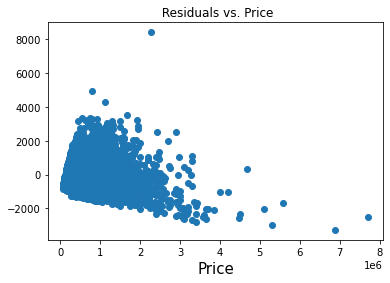

In [16]:
#Build predictions on training data
predictions_y = lr.predict(x_train_with_intercept)

#Find residuals
r_i = (y_train - predictions_y)


#Residuals vs. predictor in training data
plt.title(' Residuals vs. Price')
plt.xlabel('Price',fontsize=15)
plt.scatter(x_train, r_i)
plt.show()

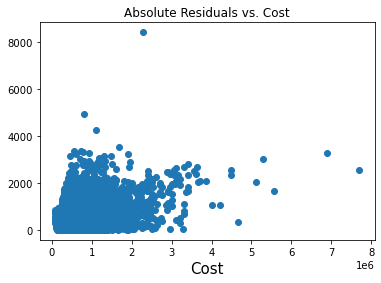

((array([-3.92810042, -3.70930759, -3.58947118, ...,  3.58947118,
          3.70930759,  3.92810042]),
  array([-3280.78758435, -3003.01625875, -2813.66687596, ...,
          4277.0226433 ,  4948.60070049,  8423.0022339 ])),
 (644.2311947461421, 5.742593261280738e-13, 0.9859315050494406))

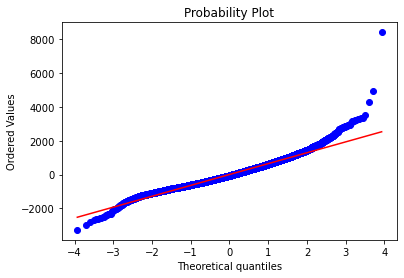

In [17]:
#Absolute residuals against predictor
abs_r_i = np.abs(y_train - predictions_y)
plt.title('Absolute Residuals vs. Cost')
plt.xlabel('Cost',fontsize=15)
plt.scatter(x_train, abs_r_i)
plt.show()

#Normality plot
scipy.stats.probplot(r_i,plot=plt)

C:\Users\racar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


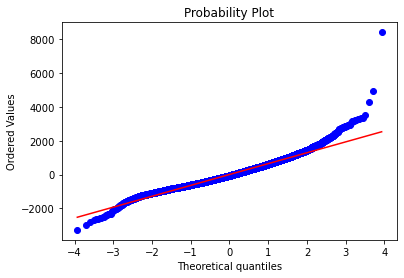

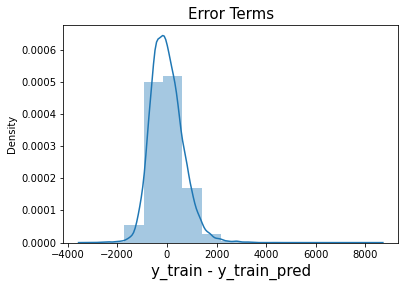

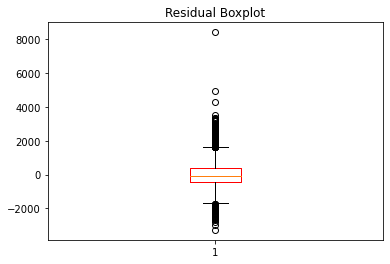

In [18]:
#Normality plot
scipy.stats.probplot(r_i,plot=plt)

#Tails might be a little heavy, but overall no clear reason to reject normality expectations
# Evaluate normality through histogram of residuals
# Plotting the histogram using the residual values
fig = plt.figure()
sns.distplot(r_i, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

#Boxplot for outliers
# plot
plt.boxplot(r_i, boxprops=dict(color='red'))
plt.title('Residual Boxplot');

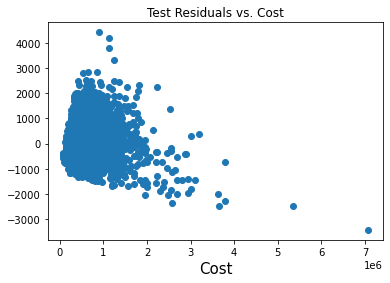

In [19]:
#Demo of how to deal with non-constant variance through transformations

test_residuals=(y_test-y_test_fitted)
len(y_test)
len(y_test_fitted)
len(test_residuals)

#Residuals vs. predictor in test set
plt.title('Test Residuals vs. Cost')
plt.xlabel('Cost',fontsize=15)
plt.scatter(x_test, test_residuals)
plt.show()

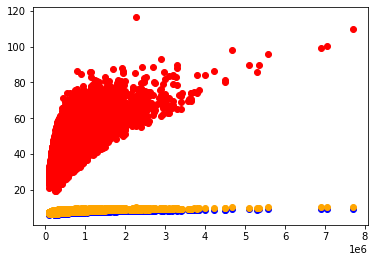

In [20]:
#Try sqrt
sqrt_y=np.sqrt(y)
plt.scatter(x, sqrt_y,color='red');

#Try ln
ln_y=np.log(y)
plt.scatter(x, ln_y,color='blue');


#Let's try a BC transformation

#Box Cox procedure on all cost
bc_y=list(stats.boxcox(y))
bc_y=bc_y[0]
plt.scatter(x, bc_y,color='orange');

#Overall, most satisfied with the sqrt transformation

In [21]:
#Run regression on this set

x_train, x_test, y_train, y_test = train_test_split(x, sqrt_y, train_size = 0.75,
                                                    test_size = 0.25, random_state = 100)


#force intercept term
x_train_with_intercept = sm.add_constant(x_train)
lr = sm.OLS(y_train, x_train_with_intercept).fit()
lr.summary()

C:\Users\racar\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            sqft_living   R-squared:                       0.440
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                 1.272e+04
Date:                Sat, 28 May 2022   Prob (F-statistic):               0.00
Time:                        12:14:37   Log-Likelihood:                -54782.
No. Observations:               16191   AIC:                         1.096e+05
Df Residuals:                   16189   BIC:                         1.096e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.3525      0.099    356.453      0.000      35.158      35.547
price       1.707e-05   1.51e-07    112.770      0.000    1.68e-05    1.74e-05
==============================================================================
Omnibus:                      174.052   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              292.107
Skew:                           0.051   Prob(JB):                     3.71e-64
Kurtosis:                       3.650   Cond. No.                     1.16e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

const   35.35
price    0.00
dtype: float64


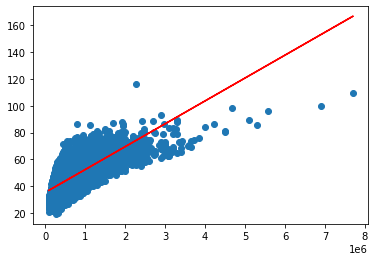

In [22]:
#Extract the B0, B1
print(lr.params)
b0=lr.params[0]
b1=lr.params[1]

#Plot the fitted line on training data
plt.scatter(x_train, y_train)
plt.plot(x_train, b0+ b1*x_train, 'r')
plt.show()

C:\Users\racar\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


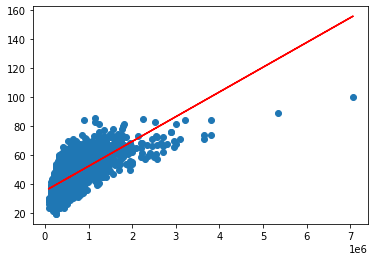

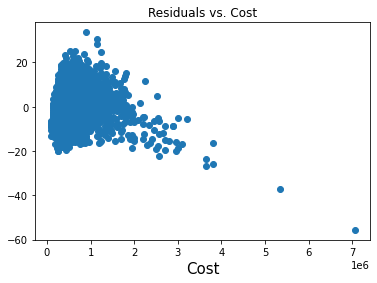

In [23]:
#Plot the fitted line on test data

x_test_with_intercept = sm.add_constant(x_test)
y_test_fitted = lr.predict(x_test_with_intercept)


plt.scatter(x_test, y_test)
plt.plot(x_test, y_test_fitted, 'r')
plt.show()

#Evaluate variance
#Diagnostics
test_residuals=(y_test-y_test_fitted)
len(y_test)
len(y_test_fitted)
len(test_residuals)

#Residuals vs. predictor
plt.title('Residuals vs. Cost')
plt.xlabel('Cost',fontsize=15)
plt.scatter(x_test, test_residuals)
plt.show()

#Non-constant variance reduced, but we also reduced our coefficient of determination